# Project 2c-Validation Curves

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [3]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

**Now let’s create some data to which we will fit our model:**

In [4]:
import numpy as np
def makedata(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    x = rng.rand(N, 1) **2
    y = 10 -1./ (x.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return x, y
x, y = makedata(40)

**We can now visualize our data, along with polynomial fits of several degrees**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
x_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(x.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(x,y).predict(x_test)
    plt.plot(x_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc="best")
plt.show()

<Figure size 640x480 with 1 Axes>

**We can make progress in this by visualizing the validation curve for this particular data and model, we can do this straightforwardly using the validation_curve convenience routine provided by Scikit-Learn. Given a model, data, parameter name, and a range to explore, this function will automatically compute both the training score and validation score across the range**

In [6]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 15)
train_score, val_score = validation_curve(PolynomialRegression(), x, y,
'polynomialfeatures__degree',degree, cv=7)


 

<span class="birk">Q1: Plot validation curve score vs polynomial degree.</span>

Automatically created module for IPython interactive environment


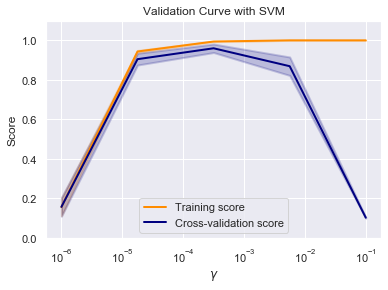

In [12]:
#param_name=logisticregression__C
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

X, y = load_digits(return_X_y=True)

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

**From the validation curve, we can read off that the optimal trade-off between bias and variance is found for a third-order polynomial; we can compute and display this fit over the original data as follows:**

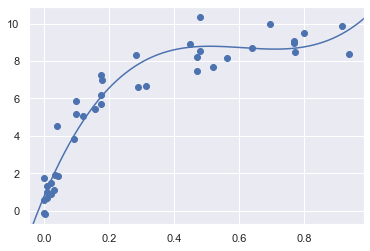

In [8]:
plt.scatter(x.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(x, y).predict(x_test)
plt.plot(x_test.ravel(), y_test);
plt.axis(lim)
plt.show()

**Notice that finding this optimal model did not actually require us to compute the training score, but examining the relationship between the training score and validation score can give us useful insight into the performance of the model.**